Marina SANGINETO JUCÁ

Marilyn CHAHINE

In [51]:
import matplotlib.pyplot as plt
import numpy as np

## Opérations de base

### 1. Ecrire la fonction permettant de calculer le degré d’appartenance de tout point de l’univers à un sous-ensemble flou.

In [52]:
def linearFunction(p0,p1, point):
  # f(x) = a * x + b = y
  x0 = p0[0]
  x1 = p1[0]
  y0 = p0[1]
  y1 = p1[1]
  a = (y1 - y0)/(x1 - x0)
  b = y0 - a * x0
  print(f"f(x)={a} * x + {b}")
  return a * point + b

In [53]:
def degreeAppartenance(x,ensemble):
  idx = 0
  while idx < len(ensemble)-1:
    if x >= ensemble[idx][0] and x <= ensemble[idx+1][0]:
      return linearFunction(ensemble[idx],ensemble[idx+1],x)
    idx += 1
  return 0


In [54]:
sous_ensemble_triang = [(1,0),(4,1),(6,0)]
sous_ensemble_trap = [(1,0),(4,1),(6,1),(8,0)]
sous_ensemble_quelconque = [(1,0),(4,1),(6,0.6),(7,0.3),(9,1),(10,0.5),(15,0)]

In [55]:
print(degreeAppartenance(3,sous_ensemble_triang))

f(x)=0.3333333333333333 * x + -0.3333333333333333
0.6666666666666667


## 2. Ecrire une fonction de visualisation qui permet de tracer plusieurs sous-ensembles flous donnés sur un intervalle de R donné.

In [56]:
def visualisation(sous_ensemble):
  x_points = [x for x,y in sous_ensemble]
  y_points = [y for x,y in sous_ensemble]
  plt.plot(x_points,y_points)
  plt.show()

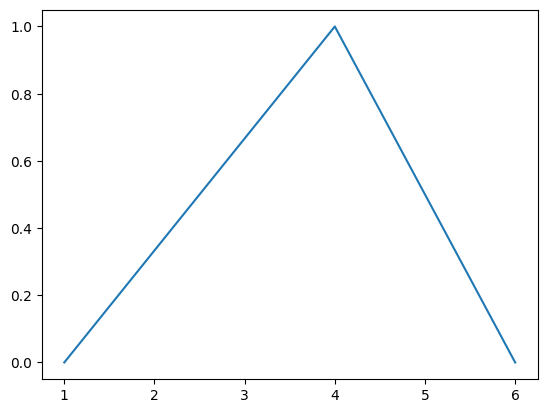

In [57]:
visualisation(sous_ensemble_triang)

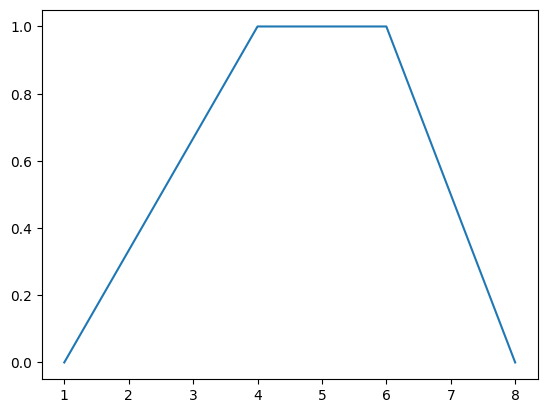

In [58]:
visualisation(sous_ensemble_trap)

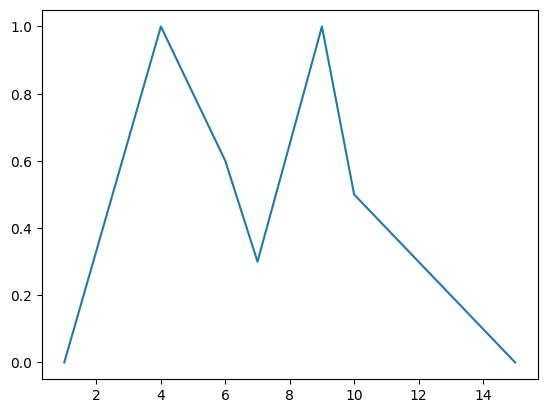

In [59]:
visualisation(sous_ensemble_quelconque)

In [60]:
def visualisation_multiple(ensembles, labels, xmin, xmax, step=0.01):
    xs = np.arange(xmin, xmax, step)
    plt.figure(figsize=(7,5))

    for A, label in zip(ensembles, labels):
        ys = [degreeAppartenance(x, A) for x in xs]
        plt.plot(xs, ys, label=label)

    plt.ylim(-0.05,1.05)
    plt.grid()
    plt.legend()
    plt.show()

f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333


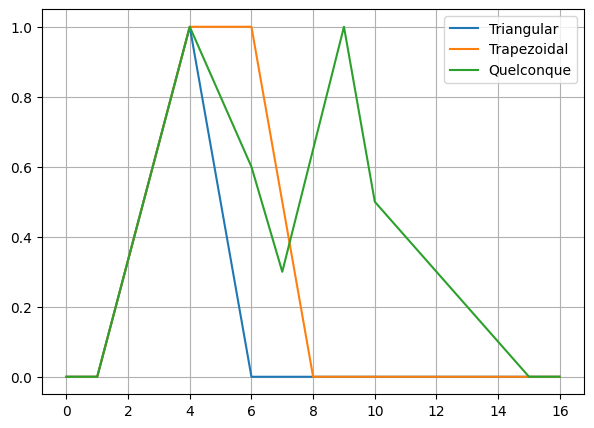

In [61]:
visualisation_multiple(
    ensembles=[sous_ensemble_triang, sous_ensemble_trap, sous_ensemble_quelconque],
    labels=["Triangular", "Trapezoidal", "Quelconque"],
    xmin=0,
    xmax=16
)


## Opérations ensemblistes

### 1. Ecrire une fonction qui construit le complémentaire d’un sef fourni en argument.

In [62]:
def complementaire(sous_ensemble):
  sous_ensemble_comp = []
  for x,y in sous_ensemble:
    sous_ensemble_comp.append((x,1-y))
  return sous_ensemble_comp


In [63]:
print(complementaire(sous_ensemble_quelconque))

[(1, 1), (4, 0), (6, 0.4), (7, 0.7), (9, 0), (10, 0.5), (15, 1)]


## 2. Définir deux classes, permettant de représenter respectivement des t-normes et des t-conormes, et implémenter plusieurs exemples de chacune.

In [64]:
class TNorm():
    def __init__(self, func):
        self.func = func

    def apply(self, u, v):
        return self.func(u, v)

In [65]:
class TConorm():
    def __init__(self, func):
        self.func = func

    def apply(self, u, v):
        return self.func(u, v)

In [66]:
def zadeh(u, v):
    return min(u, v)

def lukasiewicz(u, v):
    return max(0, u + v - 1)

def probabiliste(u, v):
    return u * v

def co_zadeh(u, v):
    return max(u, v)

def co_lukasiewicz(u, v):
    return min(1, u + v)

def co_probabiliste(u, v):
    return u + v - u*v


In [67]:
tn_zadeh = TNorm(zadeh)
tn_luka = TNorm(lukasiewicz)
tn_prob = TNorm(probabiliste)

tc_zadeh = TConorm(co_zadeh)
tc_luka  = TConorm(co_lukasiewicz)
tc_prob  = TConorm(co_probabiliste)


### 3. Définir les fonctions d’intersection et d’union : étant donné un intervalle de R, deux sous-ensembles flous A et B et une t-norme (respectivement t-conorme), elles doivent respective-ment renvoyer le sous-ensemble flou A∩B (respectivement A∪B), obtenu après discrétisationde l’univers considéré

In [68]:
def intersection(A, B, tnorm, xmin, xmax, step=0.01):
    xs = np.arange(xmin, xmax, step)
    C = []
    for x in xs:
        u = degreeAppartenance(x, A)
        v = degreeAppartenance(x, B)
        C.append((x, tnorm.func(u,v)))
    return C

In [69]:
def union(A, B, tconorm, xmin, xmax, step=0.01):
    xs = np.arange(xmin, xmax, step)
    C = []
    for x in xs:
        u = degreeAppartenance(x, A)
        v = degreeAppartenance(x, B)
        C.append((x, tconorm.func(u,v)))
    return C

f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333


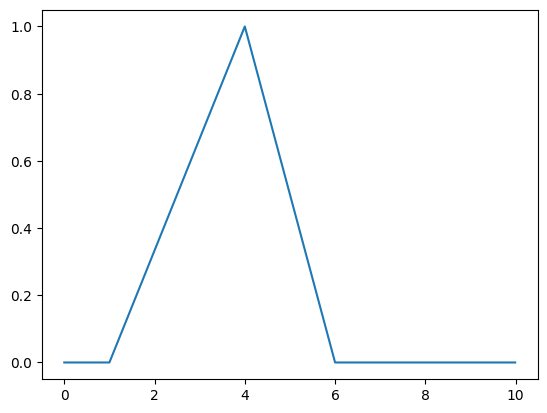

In [70]:
C = intersection(
    sous_ensemble_triang,
    sous_ensemble_trap,
    tn_zadeh,
    xmin=0, xmax=10
)

visualisation(C)


f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333


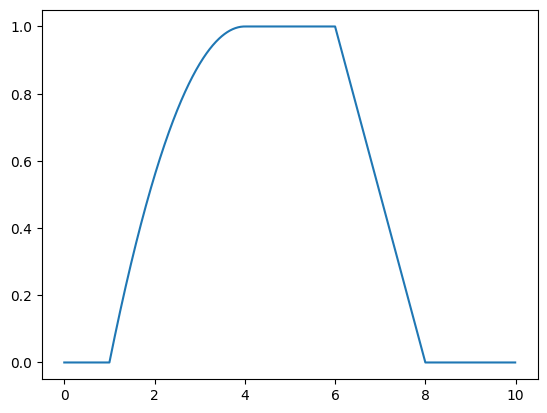

In [71]:
U = union(
    sous_ensemble_triang,
    sous_ensemble_trap,
    tc_prob,
    xmin=0, xmax=10
)

visualisation(U)


### 4. Représenter les résultats de A ∩ Ac et A ∪ Ac pour plusieurs sous-ensembles flous choisis et plusieurs t-normes et conormes et observer la préservation/l’abandon des propriétés de non-contradiction et de tiers exclu.

In [72]:
A = sous_ensemble_triang
Ac = complementaire(A)

In [73]:
xmin, xmax = 0, 16

In [74]:

A_cap_Ac_zadeh = intersection(A, Ac, tn_zadeh, xmin, xmax)
A_cap_Ac_luka  = intersection(A, Ac, tn_luka,  xmin, xmax)
A_cap_Ac_prob  = intersection(A, Ac, tn_prob,  xmin, xmax)


f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=-0.3333333333333333 * x + 1.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=-0.3333333333333333 * x + 1.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=-0.3333333333333333 * x + 1.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=-0.3333333333333333 * x + 1.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=-0.3333333333333333 * x + 1.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=-0.3333333333333333 * x + 1.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=-0.3333333333333333 * x + 1.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=-0.3333333333333333 * x + 1.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=-0.3333333333333333 * x + 1.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=-0.3333333333333333 * x + 1.3333333333333333


f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x

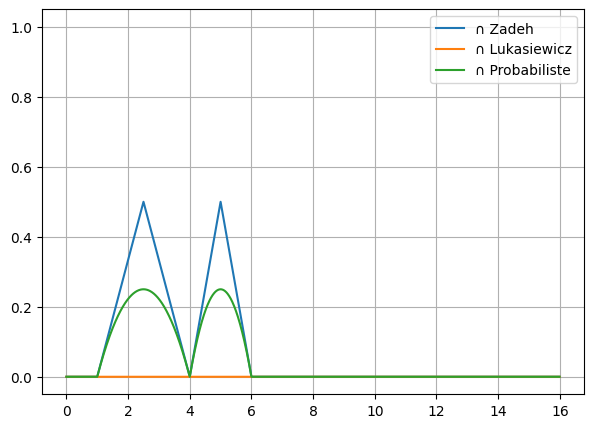

In [75]:
visualisation_multiple(
    [A_cap_Ac_zadeh, A_cap_Ac_luka, A_cap_Ac_prob],
    ["∩ Zadeh", "∩ Lukasiewicz", "∩ Probabiliste"],
    xmin, xmax
)


In [76]:
A_cup_Ac_zadeh = union(A, Ac, tc_zadeh, xmin, xmax)
A_cup_Ac_luka  = union(A, Ac, tc_luka,  xmin, xmax)
A_cup_Ac_prob  = union(A, Ac, tc_prob,  xmin, xmax)


f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=-0.3333333333333333 * x + 1.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=-0.3333333333333333 * x + 1.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=-0.3333333333333333 * x + 1.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=-0.3333333333333333 * x + 1.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=-0.3333333333333333 * x + 1.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=-0.3333333333333333 * x + 1.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=-0.3333333333333333 * x + 1.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=-0.3333333333333333 * x + 1.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=-0.3333333333333333 * x + 1.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=-0.3333333333333333 * x + 1.3333333333333333


f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x + 0.0
f(x)=0.0 * x

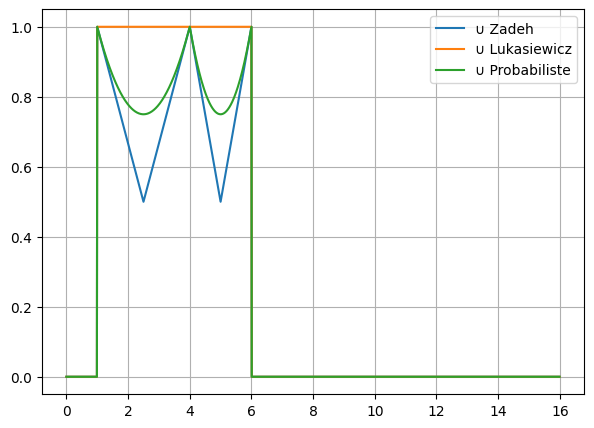

In [77]:
visualisation_multiple(
    [A_cup_Ac_zadeh, A_cup_Ac_luka, A_cup_Ac_prob],
    ["∪ Zadeh", "∪ Lukasiewicz", "∪ Probabiliste"],
    xmin, xmax
)

## Principe d'extension

### 1. Définir une classe permettant de représenter une fonction mathématique φ considérée pour l’extension. Elle doit contenir une fonction calcule qui, pour une valeur réelle donnée, rend son image par la fonction, ainsi que la fonction antecedent qui, pour une valeur réelle donnée, rend la liste de ses antécédents. Cette liste peut être vide.

In [78]:
class Phi():
    def __init__(self, func, antecedent_func):
        self.func = func
        self.antecedent_func = antecedent_func

    def calcule(self, x):
        return self.func(x)

    def antecedent(self, y):
        return self.antecedent_func(y)


In [79]:
phi = Phi(
    func = lambda x: x*x,
    antecedent_func = lambda y: [np.sqrt(y)] if y >= 0 else []
)

In [80]:
print(phi.calcule(3))
print(phi.antecedent(9))
print(phi.antecedent(-2))

9
[np.float64(3.0)]
[]


### 2. Définir une fonction extension qui, pour un sous-ensemble flou A et une fonction φ donnés, calcule l’image floue de A par φ

In [81]:
def extension(A, phi, ymin, ymax, step=0.01):
    ys = np.arange(ymin, ymax, step)
    B = []
    for y in ys:
        xs = phi.antecedent(y)
        if len(xs)==0:
            B.append((y,0))
        else:
            B.append((y, max(degreeAppartenance(x,A) for x in xs)))
    return B

f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333
f(x)=0.3333333333333333 * x + -0.3333333333333333


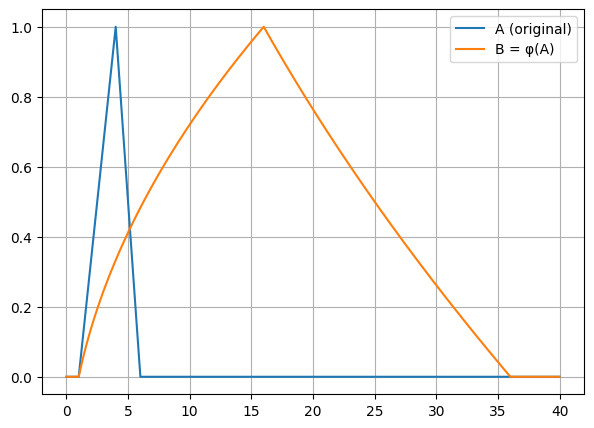

In [82]:
phi = Phi(
    func=lambda x: x*x,
    antecedent_func=lambda y: [np.sqrt(y)] if y >= 0 else []
)

B = extension(sous_ensemble_triang, phi, ymin=0, ymax=40, step=0.1)

visualisation_multiple(
    [sous_ensemble_triang, B],
    ["A (original)", "B = φ(A)"],
    xmin=0, xmax=40
)
